# Data cleaning

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
#plt.style.use('dark_background')

In [2]:
df = pd.read_csv('df2.csv')

In [3]:
# Drop columns related to the old dataframe indexation
df = df.drop('Unnamed: 0',axis = 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7627 entries, 0 to 7626
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   video_id          7627 non-null   object 
 1   title             7627 non-null   object 
 2   description       7143 non-null   object 
 3   tags              6082 non-null   object 
 4   channel_id        6020 non-null   object 
 5   duration          7627 non-null   object 
 6   view_count        7627 non-null   int64  
 7   like_count        7627 non-null   float64
 8   topic             7627 non-null   object 
 9   subtopic          7627 non-null   object 
 10  difficulty        7627 non-null   object 
 11  duration_dt       7627 non-null   object 
 12  duration_seconds  7627 non-null   float64
 13  score(%)          7627 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 834.3+ KB


# Searching for spanish videos

Some of the videos we scraped were in Spanish. Since we are only interested in videos in Portuguese, let's delete the ones we manage to find.

In [5]:
#This regex will identify some of the patterns that are unique to the spanish language
regex = r'((ejercicio)|(resuelto)|(AYUDA)|(TAREAS)|(movimi)|(ción)|(¿)|(clases)|(\sdel\s)|(tiene)|(cuerpo))'
# Make a copy of our original dataframe to avoid warnings
df_new = df.copy()
# Fill NaN values with 0 for the 'description' column
df_new['description'] = df_new['description'].replace(np.nan,0)

In [6]:
# Dataframe with (hopefully many) spanish videos
df_spanish = df_new.loc[
    (df_new['description'].str.contains(regex,na=False,flags=re.IGNORECASE, regex=True))|
    (df_new['tags'].str.contains(regex,na=False,flags=re.IGNORECASE, regex=True))|
    (df_new['title'].str.contains(regex,na=False,flags=re.IGNORECASE, regex=True))]


C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [7]:
pd.options.display.max_rows = 1064
df_spanish

video_id                                              title  \
478   NSrZq88ZJ7c  Gráficos do Movimento Uniforme (MU) - EXERCÍCI...   
528   jHAOgQs35pY                                Movimiento uniforme   
610   mIFIz-UfYPk  Movimiento Rectilíneo Uniforme (MRU) - Ejercic...   
704   QJVn00sfNjM  M.R.U. Movimiento rectilíneo uniforme. Concept...   
706   PSELrQYQTHM  M.R.U.A.  M.R.U.V Movimiento rectilíneo unifor...   
721   fMBRsWpj58o         Dedução das Fórmulas de Movimento Uniforme   
783   JVGvzWgO5i4  MCU Movimiento CIRCULAR Uniforme 🔄 Explicación...   
793   XE9UXxtep6M  MRU Movimiento Rectilíneo Uniforme 🚗 Explicaci...   
796   vJ3rk39AXDw  Movimiento Uniforme Acelerado Ejercicios (MUA)...   
810   u8j2J7sxyys  Movimiento Circular Uniforme - Uniform Circula...   
925   fHQeGLNFumE  Problema de Movimiento Uniformemente Variado M...   
926   Q-gIM9xYn3k  Fisica Basica - Movimiento Circular Uniformeme...   
2403  OcBrXf0ej60                 Movimiento Circular | Fisica prepa   
2419  JVGvzWgO5i4  MCU Movimiento CIRCULAR Uniforme 🔄 Explicación...   
2422  XpV1_0norSU          Fisica Movimiento Circular Uniforme (MCU)   
2523  Hqwos1I3ly0                Movimiento Circular Proyecto Fisica   
2548  f7dVkD3Se6g              Clase 3, Movimiento Circular Uniforme   
2572  Q-gIM9xYn3k  Fisica Basica - Movimiento Circular Uniformeme...   
2583  u8j2J7sxyys  Movimiento Circular Uniforme - Uniform Circula...   
2608  ZHQLolP4Xbs                   Dinámica del Movimiento Circular   
2634  XRWITIWBXDQ                 Cinemática del movimiento circular   
2640  yBR_5cvETms                       Movimiento Circular Uniforme   
2641  yxlkgJYDdjU  FISICA Movimiento circular uniforme MCU 01 BAC...   
2657  oDmWZD6xrK8  Ejercicio 22 - Movimiento Circular (la bicicleta)   
2659  hd3NO_2GysQ                    Movimiento Circular Experimento   
2681  depBpxSHQ54  Dinámica. Movimiento circular. Física. Problem...   
2701  kTy4pM0eCuk  Péndulo Cónico en un Movimiento Circular Unifo...   
2707  cHTYItsZk_g     QUESTÃO O4 -MOVIMENTO CIRCULAR UNIFORME (MCU)   
2709  VpwgEEDsgAE                       Movimiento circular uniforme   
2711  GnrIdM5l1nc  Movimiento Circular Uniformemente Variado (MCU...   
2712  4QEvr6j96rU                         Movimiento circular-FISICA   
2714  IsQoXpPWZ70    Clases de Física - Movimiento Circular Uniforme   
2717  JQOaQv5hRp8                          Movimiento Circular (2/2)   
2722  cYMXXLoZFIw  Movimientos Circulares - MCU y MCUV (ecuacione...   
2725  5GHNRe4upBI                       Dinámica Movimiento Circular   
2730  fdy46iEYSAw  Física: Movimiento Circular Uniforme y Variado...   
2733  X9pzBrmqWQs           Movimiento Circular En Un Plano Vertical   
2735  cHdZbUCjU3Y                       Movimiento circular | Física   
2742  qz0kIsNB-W4     Movimiento circular el péndulo cónico | Física   
2743  gPciLbBZFHY  Movimiento Circular Uniforme- Experimentos por...   
2750  Awe-zoKFq7c  Movimientos circulares  - Tema 8 - Física y Qu...   
2753  bTlDCF-pB0w  Experimento de Movimiento Circular Uniforme (MCU)   
2754  Gx_GJtGAJKY  Aceleraciones en un Movimiento Circular. Curso...   
2761  4HXXwh6JZUw  ESAD. Física. Tracker tutorial Español modelo ...   
2767  jtlfLcumwho  FISICA (CLASE Nº 42  ) CARACTERISTICAS DE UN M...   
2768  -0gAeq_s4ec                                  MCU y Gravitación   
2769  oTyqqr9OdDU  Física A: Análisis de Movimiento Circular Unif...   
2777  9LdLnGER-N0              Movimiento circular- introducción.wmv   
2778  V9Js47gjzTk  Pêndulo cônico fórmula | Como calcular a veloc...   
2782  9P3uWzKk1zw  Cuantificando el Movimiento circular uniforme....   
2783  uprXtH90dIQ  Ejercicio d3.10 - Dinámica del circular (peralte)   
2784  q9ie7SR7t-U  Coeficiente de Fricción en un Movimiento Circu...   
2786  2a-4d5C0mNM       FISICA - MOVIMIENTO CIRCULAR PROB. Nº 01.wmv   
2788  VM3QDnBdWDI       QUESTÃO O3- MOVIMENTO CIRCULAR UNIFORME -MCU   
2789  5jOrASAO9B8               FISICA: Movimient

In [8]:
# Some of the videos found by the regex are valuable for us, let's take them out of the spanish df
index_portugues = df_spanish.reindex([478,721,2707,2778,2788,3020,3105,3142,3293,3474,3839,3845,3850,4166,4349,4407,4476,4481]).index
# Drop portuguese videos from spanish dataframe
df_spanish = df_spanish.drop(index_portugues)
len(df_spanish)


78

Before dropping the spanish videos let's create a list with their channel id information. After deleting them we can check if there is still remaining videos from those channels in our original dataset.

In [9]:
#Create an array with the unique values for the channel_id for spanish videos
spanish_channel_id = df_spanish['channel_id'].unique()
# Cleaning nan values from the array above
spanish_channel_id = spanish_channel_id[~pd.isnull(spanish_channel_id)]

In [10]:
# Drop videos spanish videos from our original dataset
index_spanish = df_spanish.index
# Drop videos by their channel_id
df_new = df_new.drop(index_spanish)


Now we search for more videos using their channel id information.

In [11]:
df_new[df_new['channel_id'].isin(spanish_channel_id)]

video_id                                              title  \
2553  EXxBpG6YDtw                EsPCEx 2021 - Física - Questão 21   
2792  OsZxSiR8WOI                     AFA 2019 - Física - Questão 58   
3111  iWHV8udyu-c                     AFA 2023 - Física - Questão 23   
3302  kUImkzGsCig                   EFOMM 2020 - Física - Questão 38   
3447  T4lxbNMeaTE                              IME 2018 - Questão 27   
3483  qzIyUnF-sKs                    ITA 2019 - 1ª Fase - Questão 06   
3724  kUImkzGsCig                   EFOMM 2020 - Física - Questão 38   
3750  YLjMfH3RQnU                      EN 2020 - Física - Questão 20   
3777  iWHV8udyu-c                     AFA 2023 - Física - Questão 23   
4337  Ls8xm3Y6vew  Tipos de Contração Muscular: Isométrica e Isot...   
4782  PyXFbJrysf8                EsPCEx 2021 - Física - Questão 25   
5911  DUTWLBm9Odg                    ITA 2019 - 2ª Fase - Questão 03   
6284  h8zJNmRuOSk      Exercício - Gravitação - Nível 3 - Questão 01   
6363  SP3SjP2LxJ0                      EN 2019 - Física - Questão 05   
6405  pOccW2T9CDk                    ITA 2019 - 2ª Fase - Questão 01   
6518  zdG8ajz69OI                   EFOMM 2020 - Física - Questão 36   
6539  6rrGlj16byM                     ITA 2003 - Física - Questão 03   
6649  -ZjMyBwceh8                     AFA 2020 - Física - Questão 51   
6653  TRffPqC1bdI                     AFA 2020 - Física - Questão 50   
6724  kUImkzGsCig                   EFOMM 2020 - Física - Questão 38   
6763  jbAYNoh8Q1g                     AFA 2020 - Física - Questão 49   
7302  XdvivnCq3QA                     AFA 2023 - Física - Questão 29   

                                            description  \
2553  Playlist EsPCEx 2021: \nhttps://www.youtube.co...   
2792  Resolução de física do concurso de admissão a ...   
3111  TÓPICOS:\n- dilatação linear\n- estática ponto...   
3302  TÓPICOS:\n- estática de corpo extenso\n\n(Efom...   
3447  TÓPICOS:\n- estática\n\nResolução de física do...   
3483  TÓPICOS:\n- estática\n\nResolução de física da...   
3724  TÓPICOS:\n- estática de corpo extenso\n\n(Efom...   
3750  TÓPICOS\n- estática de corpo extenso\n\nResolu...   
3777  TÓPICOS:\n- dilatação linear\n- estática ponto...   
4337  Assine: http://www.anatomyflix.com.br/\nMEU SI...   
4782  Playlist EsPCEx 2021: \nhttps://www.youtube.co...   
5911  TÓPICOS:\n- gravitação\n\nResolução de física ...   
6284  TÓPICOS\n- gravitação\n\nNesse vídeo, vamos re...   
6363  TÓPICOS:\n- força elétrica\n- dinâmica curvilí...   
6405  Atenção: No final da resposta do item B faltou...   
6518  TÓPICOS:\n- gravitação: energia\n\n(Efomm 2020...   
6539  TÓPICOS:\n- gravitação\n\nResolução de física ...   
6649  TÓPICOS:\n- energia\n- dinâmica retilínea\n\nR...   
6653  TÓPICOS:\n- dinâmica retilínea\n\nResolução de...   
6724  TÓPICOS:\n- estática de corpo extenso\n\n(Efom...   
6763  TÓPICOS:\n- plano inclinado\n- MUV\n\nResoluçã...   
7302  TÓPICOS:\n- colisões\n- impulso e quantidade d...   

                                                   tags  \
2553  ['fisica', 'edward', 'prof edward', 'ESPCEX', ...   
2792  ['afa', 'fisica', '2019', 'academia', 'força',...   
3111  ['fisica', 'edward', 'prof edward', 'afa', 'af...   
3302  ['marinha', 'efomm', 'efomm 2020', 'fisica', '...   
3447  ['objetiva', 'edward', 'prof edward', 'cfg', '...   
3483  ['edward', '2019', '2018', 'prof edward', 'ITA...   
3724  ['marinha', 'efomm', 'efomm 2020', 'fisica', '...   
3750  ['EN', 'FISICA', 'escola naval', 'cpaen', 'en'...   
3777  ['fisica', 'edward', 'prof edward', 'afa', 'af...   
4337  ['video', 'aulas', 'anatomia', 'facil', 'gozzi...   
4782  ['fisica', 'edward', 'prof edward', 'espcex', ...   
5911  ['2018', '2019', 'ITA', 'discursiva', 'edward'...   
6284                ['fisica', 'edward', 'prof edward']   
6363  ['profedwardfisica', 'en', 'en2019', 'en2020',...   
6405  ['prof edward', 'ITA', 'fisica', 'edward', 'FÍ...   
6518  ['efomm', 'fisica', 'profedwardfisica', 'mar

Let's drop the two extra videos

In [12]:
# Drop videos spanish videos from our original dataset
index_extra = df_new[df_new['channel_id'].isin(spanish_channel_id)].index
# Drop videos by their channel_id
df_new = df_new.drop(index_extra)


# Identifying videos that are not about physics

We will use some words as a regex to try our best to identify non physics videos.

In [13]:
#This regex will identify some of the patterns that I saw were in some non-physics videos
regex_notphysics = r'((minecraft)|(roblox)|(fitness)|(transmissão\smanual)|(horóscopo)|(cirurgia\sp)|(mundoproibido)|(consciência)|(signo)|(espiritualidade)|(curetagem)|(inteligencianatural)|(multiverso)|(a\sgraça))'

In [14]:
# Dataframe with (hopefully many) spanish videos
df_notphysics = df_new.loc[
    (df_new['description'].str.contains(regex_notphysics,na=False,flags=re.IGNORECASE, regex=True))|
    (df_new['tags'].str.contains(regex_notphysics,na=False,flags=re.IGNORECASE, regex=True))|
    (df_new['title'].str.contains(regex_notphysics,na=False,flags=re.IGNORECASE, regex=True))]


C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [15]:
df_notphysics

video_id                                              title  \
318   u6rJgrZutus  Clube da Plástica: Dicas para o retorno às ati...   
329   iOW7bjZNvnY  CURETAGEM: repouso e quando pode ENGRAVIDAR NO...   
360   er5omZZ-0Pg  Tirar o útero vale a pena? Como é a cirurgia e...   
1664  s_TywAjA9SA         a cada minuto a FÍSICA fica mais REALISTA!   
1689  R0DavgnOOx4  esse vídeo de minecraft vai explodir sua mente! 🤯   
3104  eA1E2HGdbKg                          Física Quântica EXPLICADA   
3399  T75wx5Zv1vk            Aula: ''Composição Visual -  EQUILÍBRIO   
3415  bn_dQ8MfNvI  Como Manter o Equilíbrio - Corpo e Mente. Dica...   
3511  HncELjBDQRg  ⚠ ACEITA S.0.S DA ESPIRITUALIDADE? NÃO É PARA ...   
3829  Zf48u_rXhp4                Tenho um STENT no coração! E agora?   
4226  TvkQzNKCaqg  Mannual transmissionTransmissão Manual, Como f...   
4307  UBU1bayg6zk        TREINO PARA GESTANTES | Todos os Trimestres   
4323  IQN32NjCneI  Dia 5 - TREINO ESPECIAL PARA CRIANÇAS EM CASA ...   
4357  AFgPxziwr0c  EXERCÍCIOS PARA TREINO FUNCIONAL | Treino de A...   
4363  KTaGZXO0hdY  ESTÁ DIFÍCIL VOLTAR A ANDAR APÓS GESSO OU CIRU...   
4364  djMWDFAJTMY  EXERCÍCIOS QUADRIL e JOELHO FORTALECIMENTO MUS...   
4385  3zUe3xIupbI          DICAS PARA VOCÊ PASSAR NO TAF | XTREME 21   
4410  d8t-qC_deWM  Quais os cuidados após sofrer um aborto espont...   
4415  YdQjMmmQFK0  Cirurgia para retirada do ÚTERO e OVÁRIOS - Mu...   
4422  J5KuIaZ7GA8  Joelho Fratura da Patela Exercício Flexão Pós ...   
4424  kSiU816ByUU  6 exercícios para CRESCER O ANTEBRAÇO | XTREME 21   
4498  f5lz4xxUO9E  OS 5 CASOS QUE VOCÊ DEVE RETIRAR A PLACA, PARA...   
4518  QjZVhi_YpCE  Protocolo Exercícios Ombro Tendinopatia Suprae...   
5224  eA1E2HGdbKg                          Física Quântica EXPLICADA   
5693  ux2utBokhq0  SITE ''DEBUNK'' TERRA PLANA - O COPO DE ÁGUA E...   
5897  pM6FYPw12-Q  As Leis da Riqueza - Lei de Ouro 2 - Dar e Rec...   
6317  mJvtnQwCxLk  TÚNEL DE FUGA MEGA VELOZ NO MINECRAFT - 29 Cre...   
6325  GbJJRsS6OR4                          Buracos Negros Explicados   
6342  8d1RxSBkjQ0      Minecraft MAS a cada salto PULAMOS mais ALTO!   
6376  TtzAU74_yTY                    100 Mods Realistas em 24 Horas!   
6406  ioKFiz3_Hps  A VOVÓ MALUCA NOS PRENDEU E PRECISAMOS ESCAPAR...   
6408  pddbTyXm2kQ  VAMOS DAR UM JEITO NESSE PROFESSOR MALUCO DO R...   
6414  wInU2X0blLU       Roblox - TENTE NÃO SE IRRITAR! (Rage Runner)   
6431  sbslBvx7hTU  PRECISAMOS FUGIR DO PROFESSOR MALVADO no Great...   
6457  J6qD9eNvqwI  Tivemos que FUGIR DA ESCOLA no MEIO DA AULA | ...   
6480  hnKhL9RFmZs              EU CRIEI UM JOGO NO ROBLOX EM 1 HORA!   
6487  Kg9NgEmiWiU  😷5 Melhores Jogos do ROBLOX para Jogar na QUAR...   
6488  E1tgSVfZPO4                    SKATE MORTAL - NÃO É PARKOUR!!!   
6507  M6vGXFyiQc8  TERROR na FÁBRICA de BRINQUEDOS do HUGGY WUGGY...   
6512  0utjw8fjBR4       Roblox - DESAFIO RÁPIDO vs LENTO (Mega Obby)   
6527  lffsXU6hzu8  BETO VS DAVI: DESAFIO DA CORRIDA SPIRAL IMPOSS...   
6530  xfnH6cSiJh8  MEUS AMIGOS ME PRENDERAM NA PRISÃO MAS EU FIQU...   
6548  A4j60rHoeLU              TESTANDO O BARCO DO TIKTOK ft @Tex HS   
6573  o272MbCmzlc  TIRE NOTA VERMELHA E O PROFESSOR MALUCO TE PEG...   
6574  8o3epY8h0vY       a cada dia o MINECRAFT fica mais ASSUSTADOR!   
6580  p0lkEEtkpkU  GANHAMOS NOVOS PODERES NAS FÁBRICAS DE ULTRA E...   
6587  qhUVsw-OIlM  CHAPTER 2? ESCAPE DA ESCOLA DO RAINBOW FRIENDS...   
6588  b-q49uQBLz8  VIREI O HOMEM ARANHA PRA ESCAPAR DO AZUL BABÃO...   
6591  hg4ExpkgdDE  FIZEMOS UMA SUPER BATALHA DAS FÁBRICAS DE ULTR...   
6842  fuZU0HLRbWA              A Física nos Vídeo Games | Nerdologia   
6947  eA1E2HGdbKg                          Física Quântica EXPLICADA   
7325  GDWKx90sxFw  LEI DA GRAVITAÇÃO UNIVERSAL DE NEWTON - RESUMO...   
7620  K6n5hnc3iZ8         O QUE SE SABE SOBRE A TEORIA DO MULTIVERSO   
7621  Ii-nBFqWAQM  ELES NOS CRIARAM – EVIDÊNCIAS DE QUE SERES SUP...   
7622  A4u8yOaFFaw  Desista Do Medo E Da Fé E Alca

In [16]:
print(len(df_notphysics))
# two video was about physics
index_physics = df_notphysics.reindex([7325]).index
# Drop physics videos from df_notphysics dataframe
df_notphysics = df_notphysics.drop(index_physics)
print(len(df_notphysics))


58
57


Before dropping the non physics related videos let's create a list with their channel id information. After deleting them we can check if there is still remaining videos from those channels in our original dataset.

In [17]:
#Create an array with the unique values for the channel_id for non physics related videos
notphysics_channel_id = df_notphysics['channel_id'].unique()
# Cleaning nan values from the array above
notphysics_channel_id = notphysics_channel_id[~pd.isnull(notphysics_channel_id)]

In [18]:
# Drop non physics related videos from our original dataset
index_notphysics = df_notphysics.index
# Drop videos by their channel_id
df_new = df_new.drop(index_notphysics)


Now we search for more videos using their channel id information.

In [19]:
len(df_new[df_new['channel_id'].isin(notphysics_channel_id)])

75

We can drop these extra videos

In [20]:
extra_notphysics = df_new[df_new['channel_id'].isin(notphysics_channel_id)].index
# Drop extra non physics related videos by their channel_id
df_new = df_new.drop(extra_notphysics)


## Manual labor cleaning

We now go line by line investigating if the videos are about physics or not. We will use their channel_id information if their channel is not about physics or the video_id for videos without channel_id information.

This procedure is very tiring. I will devide the cleaning in four groups in order to make it a little bit more attractive to work on. 

1. Videos with more than 100.000 views
2. Videos with views ranging from 10.000 to 100.000
3. Videos with more than 1.000 views and less than 10.000
4. Videos with less than 1.000 views.

### Step 1 - videos with more than 100.000 views

In [21]:
pd.options.display.max_rows = 1100
#pd.set_option("max_rows", None)
df_new[df_new['view_count'] > 100000]

video_id                                              title  \
8     vAgN3U36obA          Aula 01 - Cinemática - Conceitos Iniciais   
14    UbRS2iHt-uo  COMO ENTENDER O MOVIMENTO UNIFORME? | QUER QUE...   
32    g61dy6E8JNo  MOVIMENTO UNIFORME - FÍSICA BÁSICA (FÍSICA do ...   
52    s4Vh7AkfYOY    Cinemática 08: Movimento Retilíneo Uniforme MRU   
60    VJCWdMIqhbs  FÍSICA - CINEMÁTICA: Deslocamento Escalar e Di...   
61    b6EfqbNDK-c  MOVIMENTO RETILÍNEO UNIFORME | QUER QUE DESENH...   
65    a7RxDGo8Zks  Conceitos iniciais - CINEMÁTICA - Aula 1 - Pro...   
77    _6ILoTeChCE  Física Total - Aula 02 - Conceitos iniciais de...   
85    j0gBi-_zorg  VELOCIDADE MÉDIA | RAZÕES ESPECIAIS | \Prof. Gis/   
92    j-sW3PrpOZE          Aula 03 - Cinemática - Exercícios Simples   
97    AEg97h51UnM    Primeira Lei de Newton: Inércia - Brasil Escola   
98    8r1KVS0HaJk                               Física - Queda Livre   
106   QRn-HKjCbps  Cinemática 10: Função Horária do Espaço - Parte I   
108   Cx0L-UcEAgs  QUEDA LIVRE E LANÇAMENTO VERTICAL | Resumo de ...   
113   AnOKxNhpRPo        QUAL FÓRMULA USAR??? - [CINEMÁTICA DO ZERO]   
114   RkEnB7Ghy4c  FÍSICA - CINEMÁTICA: Velocidade Escalar Média:...   
116   G2Lv2y9Zapo  MOVIMENTO UNIFORMEMENTE VARIADO | MUV | DESCOM...   
121   kPS4Amy2FZg  MRUV - MOVIMENTO RETILÍNEO UNIFORMEMENTE VARIA...   
123   Vzt2BBjqcqQ  Movimento Uniformemente Variado (Teoria e Exem...   
146   5AEZCsEAopY  LEIS DE NEWTON | FÍSICA | Mapa Mental | Quer Q...   
151   dl8g34ae4lw  Movimento Uniformemente Variado (Gráfico Veloc...   
153   wlTa_yTElGM  VELOCIDADE MÉDIA - FÍSICA BÁSICA (FÍSICA do ZE...   
157   14EHg91psHw          Lançamento Vertical (para cima) - Aula 04   
159   recMlMwRhGw                        Física - Notação Científica   
162   Fb8eLUL9EdM   Aula 02 - Cinemática - Posição em uma Trajetória   
166   nRbb6c2I1lk  FÍSICA - CINEMÁTICA: MOVIMENTO UNIFORMEMENTE V...   
167   2PUoDYnrOsU  Sistema Respiratório 5/6: Mecânica Respiratór...   
174   sPjTVgZJzh0  COMO CALCULAR ENERGIA CINÉTICA | Resumo de Fís...   
177   lEyUFyKPqXA  UNIDADES DE MEDIDA E CONVERSÃO | FÍSICA | QUER...   
178   dZ90DEMeZU0  Aula 02 - Movimento Uniforme - Exercícios de A...   
184   QZRXElcE4sA               Física - Ondas e som: efeito Doppler   
187   yYI-YOaUO_A  Hérnia de disco piora mais com repouso ou movi...   
191   r6pKRscSTyg            MOVIMENTO UNIFORMEMENTE VARIADO - (MUV)   
192   T0gLFInHEMw                                Física - Cinemática   
194   a1Y-jCoJJ-c  🚗 Cinemática (2/8): O que é MRU? - Movimento R...   
205   UkYx35BcRIo    Velocidade Média - Exercícios Básicos (Aula 02)   
206   065cL1tar4E  INTRODUÇÃO: POSIÇÃO E TRAJETÓRIA | FÍSICA | DE...   
208   TSK8S3vLVk0    FORÇA RESULTANTE | Resumo de Física para o Enem   
217   dU14qCv5AuI                            Física - Leis de Newton   
219   BMrIHgI0PlU  CARGA ELÉTRICA - ELETRIZAÇÃO - FÍSICA BÁSICA (...   
220   93zSr_6qERI  Impulso e quantidade de movimento - Mãozinha e...   
223   KdlBRrLWDoU  Me Salva! CDR01 - Posição, Velocidade e Aceler...   
224   0lmB4pNgQWU  Física - Leis de Newton: 1 lei de Newton - Iné...   
229   NhcAyV8ERyM  Convertendo m/s para km/h e km/h para m/s - Di...   
230   79hQ7yKCrYA  Movimento Uniformemente Variado (Exercícios de...   
238   rkDl-p38-4Y  Aula 07 - Movimento Uniforme - Velocidade Rela...   
239   NcbzFzDcwcA  Me Salva! DIN012 - Dinâmica - Peso aparente e ...   
240   jcUigpvz68M  Movimento Uniformemente Variado (Gráfico Espaç...   
247   HoIJdaKQBfI  Aplicações das leis de Newton- Exercício resol...   
252   wJwDTUL6fz0              LEIS DE NEWTON | FÍSICA | DESCOMPLICA   
256   YCIgSGAJvlQ                                     Pêndulo simpes   
258   2AnUH5cke8w  Impulso Nervoso - Potencial de Ação - Tecido N...   
261   0nZNano2AUw  Aplicando as Leis de Newton - Aula 08 (Polias ...   
266   0od95V4kmAk                         Força Peso - Brasil Escola   
275   Lebjw3O4gIA                           Físic

### Select via channel_id

In [22]:
# Channel id of videos not about physics with more than 100.000 views
channel_id_list_one = ['UCUHW94eEFW7hkUMVaZz4eDg','UCsXfMCHEpZ5L1aVGSgb-EKg','UCvThY8eyKOnPxhJquurcW1Q',
                   'UCjaxmdb_gTWbz9XF5rzvgGg','UCFavCrh1No6Bkd0SRj8mqxA','UCHggIF2Ee-OqgIgtYihoBiQ',
                   'UCyZPowdAaY-rOf0_S7RBlrA','UCKPDSWAfn7kWa7BaZzdA7wg','UCFuIUoyHB12qpYa8Jpxoxow',
                   'UCGPxohN0plAQM0PD5faJkvQ','UCbzIsTMuEYWXLFQ-ZUhfUcA','UCcGCBiz-9amzsMU4VH3TKlw',
                   'UC-6NoX7qEhMACQi0tmOGGAg','UC4kt-PRWbwpcArLIhE26mIw','UCXHm4g2vzvFYgZUL8PETqKw',
                   'UC5gkPEW2wsK_z0kxVzgg_6w','UCPl_3zCQnCB4Iv79UD_i-5A','UCVyTgDJ8shzEQcACKtN8G1A',
                   'UC3cFOnbfiLe2xLoTPauY4wA','UCiKjCNat4maB49PZ-YPjDzQ','UChyyLkExyIi_x17qNEyo4Fg',
                   'UCtD4ZYxxrYZG6lCdqMirGkQ','UCEOGSdXwcXcNfcuDGbjmgOw','UCaYZLVwOnGzmKXvM0SidHtg',
                   'UC-ZAa6D_OqwKPuF0k9ztjPg','UC6u9oVPApti3vvMFDYcO3Ng','UCYtaoJSk9iIrFxx8eZB15ag',
                   'UCIJuj6jEEM3PUxI4UJhgbNw','UCt-HbGBNbotFv27y-j-gR8g','UCtW1PsP-9sHdQNF0MiSyj_Q',
                   'UCZ7BbnhXm_OJO6hwhB4pWRw','UCsooa4yRKGN_zEE8iknghZA','UCIJf8XecnhzdVxM_3ZeyYGQ',
                   'UCymE80p2pHiTP4Xye327CVA','UCH2958aySlHIuMzpUE8Xe9A','UC8f05kF72flEueRPXDU-srw',
                   'UC3OEyUVycZn9e5_Tl7pPlWg','UCIMubdQX9kPOoslab16McIQ','UCIQPHl1WKKTt9KkWyo_JNig',
                   'UCiGxYawhEp4QyFcX0R60YdQ','UCoU1JKG3dVHiwX_SULxCTxg','UCukwGwBD-pAbGzoJo6ZXPtQ',
                   'UClu474HMt895mVxZdlIHXEA','UC376n347Ob5Lwzq2WGzF1AA','UC3O9y5JRSBqn4YhCEvBys_Q',
                   'UC2bXaq5nilj0GIQlHSrGwjg','UCZrvYw-aW36ztpZcCZC-eoQ','UCtvvTFp0XANyllOdmzZr9VQ',
                   'UC-ZiVHiXO_RIIU2KZz7NvZg','UCc_SJNc1V5ghzvljj7j-zKA','UCP-Vg2PcmLiWpEdvMI1R35w',
                   'UCdmGjywrxeOPfC7vDllmSgQ','UCYKeu41LiJOIoyEkStWqCLw','UCCqfMG8dLMXALjppuyCyxNw',
                   'UCPSF_i4TthY5-7XMnLjh2jQ','UC9zqTTVeClpqMQ5CLuJdWtw','UCUtDAMp91VCfHTZ9_ypKRPA',
                   'UCGfBE94turq_hyKMxB-Dfrg','UCCD5yY6oDcu-PvLnP4FIJ8A','UCWuihCjrujsgRZ4ohWidZWw',
                   'UCiWg1nzOYkePQmCYOyOXcJw','UCWVXY200ZHWULaDTvDQtfpg','UCb4z4N8aIr2ZsrJ_U8jBHrQ',
                   'UCPX0gLduKAfgr-HJENa7CFw','UCr2ubdh-3YoA5oz8l3SUIPA','UCSZnx0L5n3BWwIk6m3F5w7A',
                   'UCLHA3hx1G4exHbHD2Q8n1qg','UCNccY3N0vCqRlBcg-OOrzRA','UC0f866RMRdL5mSVnipiOHxg',
                   'UCaPqH0GDCZnKlFSB910V5OQ','UCIvQJmPaDR2lMDDNhb4--bA','UCgcgJUyNqXr-dWOfJt77tDg',
                   'UCRwMRTPXdt8GjhvDWC0YwXw','UChacze-HI7IYvR1ON1CB6gw','UCKlA33S5yNRHlpzHPHhUDhQ',
                   'UCnDILpzu0H84Xeef9r_C5bQ','UC4MolCOr3jDejbKqFv2WRkw','UC7NJX2zaHwaoy8tOc_BVhZw',
                   'UCo_EfC6_vPAh-mnjV2mC-JA','UCWasIIoQ6u4Z7Nxmx6HQZRA','UCMk1wBIsHmalYeE16GkD6bg',
                   'UCOHAtkxkDH2a6_i3gjXhtKQ','UCwMN0H_-bxpOjjqXAZC6TEw','UC_s2N8cvRQVqQ2Q0Slzstgg',
                   'UCiyU65RODlF4YYdTL4GnPuQ','UCaVpzaxGCCrNgZt5l4lh5OA','UC9a-FA9au8kQwrVBdZFdQUA',
                   'UCurXCGt11TBLPkhLWhy5wBw','UCi65JMJcDiMApPaFpdTGntQ','UC0zw75eP4E6jnEGIzSFCEOA',
                   'UC59k9M9B_CQeCMaNu6A3orA','UC7C2ho2jqT2PM2uMGoFKBhw','UCut5QhirsdcfvZeJ4VrlnLw',
                   'UCiVYr_4LRVms88C5BVu6tMQ','UC9e9YKIrMu_WsEdjV2Z8Nlg','UCUbyDJL2Uty7JEjF_KtwJyQ',
                   'UC-EO930ApzNqNARzJ_L2WVA','UCMKaQiaR-YAinNBLBtk5T8A','UCViOtR2T9BYjmzVuIjj_mQg',
                   'UCWYbMXFVXA330WbWJBoqtPg','UCrKhB-kOIG4ARPEs2K2ZqdQ','UCw-hc7ZJummS0AvWyjUX56A',
                   'UCLAjlhgOLWQqVGD0mPaX_cw','UCcpHQ-vfrQ-BL9GjYafNmbg','UCRCTXdxzbZYrL2Ia6oqY9_Q',
                   'UCmkb0Ixk7Ccc_hnURjNSzIA','UCLXl1V6n82Dyg1VhVgSL0nw','UC9VhtuZ-YIL9vwNJRIq2XhA',
                   'UCm7oMXPyfImUAUNpWPlQKGA','UCbQGrCnS8EIwoa41sBQ5AcA','UCpWZ9WZbQViGiUijaQP36Jg',
                   'UC1Nm7gQCcGvgLyVcGTXp-Ww','UCfYrK5JU5EznsnK3wQE7iIg','UCCKrcO_JfvmpM_QYnbE9wPA',
                   'UCD9Sbq0xN8eE2xcYhTkyh-g','UCV2TN9FBXrgiewoYUQniEMA','UCw_S3AgRp0t-iXw4x5aaZ_Q',
                   'UCzih_q-LDnybtBHTqBF_0VA','UC70ccSxuICAVOF2tWZrECWg','UC4vKo9ShvTcSKScyO-kwHpQ',
                   'UCN4qsyHzAjooTLaMou0SLmg','UC6S3mtRkf-or3eb3W4SAXEg','UCASM0cgfkJxQ1ICmRilfHLw',
                   'UC9PmLGbztiG9UqcY6A5jRIQ','UCYTYtXo30ES3g5iWQ1DT_Wg','UCKHhA5hN2UohhFDfNXB_cvQ',
                   'UCvei33F-JxxcG3voKcYKVyg','UC9CGUg-NKKet_-a30dejytQ','UCHpdDOGOXk-Shu_4n3s3hJQ',
                   'UCHDV3JN5aqxAy9hwTTVHJow','UCLPrvZNXcyeeYwu37s5B4YQ','UCb7a5Qoaw98JZaAt44rTqtg',
                   'UCChcB86TbSMsV8rkuv5P6hw','UCaa9SAzVycyJIN9FEizlCuQ','UCP391YRAjSOdM_bwievgaZA',
                   'UC53RGn66h410b5wkQlNvb3A','UCDVaeMc16MXLuleGQircOiQ','UCy7oVBYY0FGXeeJpy6ITXxQ',
                   'UCDuvpu5IeIWzlxcOXjxEUBw','UCDtVoSwSwQgwhcC89Nlz5Vg','UCMYTIyqS1-7wT-3pBB8bR5A',
                   'UCv2_sodDNK3DUMjRVbVWegA','UCN-opsqqDunWO6h5uCp9Y4g','UC91Vh83RMKd0iPRuRy92x-A',
                   'UCC7A9XT-CJ0lJGbz2OWNw8A','UCAz_Eszk3YjqVLw6oXbSKQA','UCdLt2OhiWNLRsGNF-0DE4-A',
                   'UCw2_Zvfv9thn-M9MTHVLkuQ','UCCBJFU-sIJi4B2AQnLCP8Yg','UCK3sW3_2AqB0NQ9E_vwAeEQ',
                   'UCH2VZQBLFTOp6I_qgnBJCuQ','UCKaKxSsyesC2NqNh89Ss7gw','UCpL1kGiAgacw5aNepY3srzg']

# Get and count all videos from the channels above
len(df_new[df_new['channel_id'].isin(channel_id_list_one)])


155

In [23]:
# Get index from videos with more than 100.000 views that are not about physics
index_onehundred_thousand = df_new[df_new['channel_id'].isin(channel_id_list_one)].index
# Drop extra non physics related videos by their channel_id - step 1 - videos with more than 100.000 views
df_new = df_new.drop(index_onehundred_thousand)


### Select via video_id

In [24]:
# Channel id of videos not about physics with more than 100.000 views
video_id_one = ['UpRJD8zt3Qs','Q0huvb886HE','xfnH6cSiJh8','rk78NMa9s_o','HTJTaaoHuaQ','TtzAU74_yTY',
                'wATQ0CcSyKM','4aCtWXQl4oM','tFGlxXZSTqY','zGqQRK_EnaY','2G7qtjsQAZs','cHZWZhHQq4g',
                'MDRqtfyyvFc','jOrVjrGy4iE','kR5FSlOPrhI','AYXzh5Toguc','JkWzEq6ZO-0','mEqSYyFJMqE',
                'VgCR5E16ZUk','y_1gxGuAmPs','FeLC8qaScds','kU0o2DYHRqE','-j50dgnR8eA','tUEPFLQfVRY',
                'erPHA8UTZOo','9hY-oga_HBk','IQN32NjCneI','6RCztSzqzug','PUMr7lUAVck','bWJrg5DyuMY']
#Look for the same regex_channel pattern on the 'title' column
len(df_new[df_new['video_id'].isin(video_id_one)])

22

In [25]:
# Get index from videos with more than 100.000 views that are not about physics using video_id
index_video_id_one = df_new[df_new['video_id'].isin(video_id_one)].index
# Drop extra non physics related videos by their channel_id - step 1 - videos with more than 100.000 views
df_new = df_new.drop(index_video_id_one)


In [26]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7218 entries, 0 to 7619
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   video_id          7218 non-null   object 
 1   title             7218 non-null   object 
 2   description       7218 non-null   object 
 3   tags              5700 non-null   object 
 4   channel_id        5640 non-null   object 
 5   duration          7218 non-null   object 
 6   view_count        7218 non-null   int64  
 7   like_count        7218 non-null   float64
 8   topic             7218 non-null   object 
 9   subtopic          7218 non-null   object 
 10  difficulty        7218 non-null   object 
 11  duration_dt       7218 non-null   object 
 12  duration_seconds  7218 non-null   float64
 13  score(%)          7218 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 845.9+ KB


### Step 2 - videos with more than 10.000 views and less than 100.000

In [27]:
pd.options.display.max_rows = 1500
#pd.set_option("max_rows", None)
df_new[(df_new['view_count'] <= 100000) & (df_new['view_count'] > 10000)]

# CONTINUAR DO ITEM 4846 TREINO PARA IDOSOS

video_id                                              title  \
0     YBt1-ry_cbw  Stoodi | Pocket Aula: Física - Movimento e Rep...   
3     yYxS0uNwbV0   9º Ano - Física - Aula 01 -  Movimento e repouso   
6     54rgpv3SBOU  CINEMÁTICA ESCALAR | Definições de repouso ou ...   
10    Gm1WZt3RARc                       Aula 2 - Movimento e Repouso   
11    p-zRw0Meo6k                   Movimento, Repouso e Referencial   
22    Prc3BbuaOR4  VELOCIDADE MÉDIA - Repouso, movimento e trajet...   
25    e3AchZF-MTE  004 - Cinemática Escalar - Referencial - Movim...   
26    Os5Bieh5vnw  AULA DE FÍSICA: Cinemática Referencial - Ponto...   
45    PjXgL3OGsQU  Cinemática 02: Deslocamento e distância percor...   
47    9LAjBBGBVxA  Movimento Progressivo e Retrógrado - Brasil Es...   
50    udgGwUHMP2k     Stoodi | Pocket Aula: Física - Trajetória 2022   
51    GfZHwNze_8Q   Referencial, Repouso, Movimento e Ponto Material   
53    gairyZsQY8o  Física Resolvida - Vídeo Aula de Física - Cine...   
57    Too_l2YyzM8  Cinemática 16: Aceleração Média / Aceleração E...   
62    agQn8ai3ZI8      Cinemática 01: Ponto Material e Corpo Extenso   
63    XadorEFbIwg  Ponto material e Corpo extenso | Conceitos bás...   
66    ceq1kDonzks  Fisilândia - Cinemática - Aula 1 - Movimento r...   
93    mwlCsV7eUc8                  Introdução à cinemática | Parte 1   
102   Ej4149lYkI8  Cinemática 15: Movimento Retilíneo Uniformemen...   
115   kSLreJ-rCqs                      Cinemática: Conceitos básicos   
126   ax9IkOIzmuo  Física - Aula 08 - Referencial e Trajetória - ...   
130   vhcRCIwZ-g0  TIPOS DE MOVIMENTO: Progressivo, Retrógrado, A...   
133   oZPWOXtIUFI     Cinemática 04: Grandezas Vetoriais e Escalares   
135   WsJbj0TGMhQ  MRUV | Movimento Uniformemente Variado | Quest...   
149   JnygraqNk0w  Aprenda a resolver exercícios de ENCONTRO e UL...   
152   vWpE-1Fjn4k  QUEDA LIVRE E LANÇAMENTO VERTICAL (RESOLUÇÃO D...   
155   _jUKKd2bY18  Cinemática 12: Velocidade Média / Velocidade V...   
160   V5lSwGMdd1c  Estática: Equilíbrio dos corpos - ponto materi...   
176   U326MNy7FRQ           Cinemática - Resumão ENEM - Mundo Física   
188   EC6PtxemS9A  MHS | Movimento Harmônico Simples  | sistema m...   
189   Q3iEm5jKQtY               Física  - Movimentos - Parte - 1 - 2   
190   PnmGKn1xr0U    Como viajar de graça: A lei da INÉRCIA | Física   
211   pOrzefTAO-w  Cinemática 05: Velocidade Média, Velocidade Es...   
214   SCHiQSqf_5c  Aula 08 - Galileu e o Princípio da Relatividad...   
222   SJjuXIyeLo8   Física - Cinemática: Movimento Queda Livre (MQL)   
226   xjs7KoIQ14M  Comportamento da pressão arterial e frequência...   
227   tfOFoSYCNpg  Aula 09 - Galileu e a queda dos corpos - #Cana...   
232   GPYL7YFTLYI  Movimento Retilineo e Uniformemente Variado | ...   
235   -NAj1qowzfk   MRU - Função Horária - Encontro de dois carros 1   
242   CW-vWIXFmDM           ENEM 2016 - Questão 46 (Caderno Amarelo)   
246   UdWEqen7ltg                    Força de tração - Brasil Escola   
249   ahJD6h1O1YQ               Cinemática 19: Equação de Torricelli   
250   rmP-sg-5l0c                  Física -  Cinemática: Queda livre   
251   iuPrkzJp20I                  LEIS DE NEWTON - [FÍSICA DO ZERO]   
257   3sZfccowDrk              Dinâmica de Rotação - Momento Angular   
262   zq7lGhKVyV8  Conceitos iniciais - CINEMÁTICA - Aula 1 - Que...   
263   nKvlxOQYKho  Física I: Movimento unidimensional (parte 1 de 2)   
264   xks8vcxfzOA  050 - MCU ( transmissão de movimento / engrena...   
268   cnFflpTz4ZE  Colisões elásticas e inelásticas | Impactos e ...   
269   CslkVQMKaqU      LEIS DE NEWTON | Resumo de Física para o Enem   
270   gHe26-eI4fc  Física - Leis de Newton: Força de atrito está...   
274   r6HBpvgXzU0  Física - Leis de Newton: Parte 1 - inércia e p...   
277   7k3dE6bIS20                           Física - Força de Atrito   
278   -OH7Fg6KKBQ                                        Queda Livre   
279   9qQ29tbXS7I  Me Salva! DINS05 - Exemplo I: 

### Select via channel_id

In [28]:
# Channel id of videos not about physics with more than 10.000 and less than 100.000 views
channel_id_list_two = ['UC3qZ7NcgLIsg1YgV-wkoxEQ','UCoADwmocfAiikwGeRVoPLwQ','UCjlNH7QEhofP-knqYyDwgew',
                      'UCyiOZqruYaEpSHSE0Phqw0A','UCIBaDdAbGlFDeS33shmlD0A','UChsZDP7pW_08Sk6Tp4U8KJA',
                      'UCSlVsTea3VTibSfHBoeBe5g','UCc0cU92Tf7rvd2gr-CpVO4Q','UCledB0SeULMkjN_eBh4rPHQ',
                      'UC5eb1AiytcqWXjQcjz01NUw','UCTATQum4Agigqmhyw8-xAHA','UC4GSZI2NS5TaeLCP15EmnsA',
                      'UC6fYU-HnraZ7bfUCouSwumA','UCc8yV8Mz680AtFMZ6o1kg5A','UCszLDAYCEom-dwxsOsqVe6Q',
                      'UCcZHDMjoQlqks9Dg7JTZObg','UC4z9fu3hN2y6cF8j1uVLONg','UCjY_LBR_7-Ile0MAsbeJWBg',
                      'UCccLObv7TgxHnghz4iGzu7A','UCa_gaIjfnlmp13Ug2eT6XTQ','UCPuPNIzgzRIcL8w-NIo8XsA',
                      'UCMqWB7LE7j_Jr0xHjFgRnUQ','UCmiptCNi7GR1P0H6bp9y0lQ','UCIE0QFHDLQLBerkwcJHYVJg',
                      'UCShY9gfTKSYujbB-qhO6CgQ','UCK-SilN5e8UIZ-5mdj1igqA','UCL7QIOZteWPpBWBOl8i0e-g',
                      'UCuFhC6JQ0W4SfaFvaon168g','UCKtrQSjlrl64NE2OcxN8kfQ','UClUUD-Ol4vEW9q8kmHaBvfw',
                      'UC4GSZI2NS5TaeLCP15EmnsA','UCUASB3Iq1WOSpzPUpFCGxFw','UCKtrQSjlrl64NE2OcxN8kfQ',
                      'UCi25TK5N0ofIz9iAORvxIGA','UCvtu7lNy5qsRV24OlhsufTQ','UCQmkM00VARUgkaOsLbWOsHg']


# Get and count all videos from the channels above
len(df_new[df_new['channel_id'].isin(channel_id_list_two)])

36

In [29]:
# Get index from videos with more than 10.000 and less than 100.000 views that are not about physics
index_ten_thousand = df_new[df_new['channel_id'].isin(channel_id_list_two)].index
# Drop extra non physics related videos by their channel_id - step 1 - videos with more than 100.000 views
df_new = df_new.drop(index_ten_thousand)


### Select via video_id

In [30]:
# Channel id of videos not about physics with more than 10.000 and less than 100.000 views
video_id_two = ['xjs7KoIQ14M','k9NBJXy4AVc','e2otSynNkoQ','ZZCL_3xQvtc','lI5Ic-RAM9w','OjX-dMpoSwM',
               'TbyDfTTeGL8','gVBzobb_rwc','SPlkWbF5OW8','JK3BuIvRIUU','WsyZf6nb7kI','Bmwtx7XzTkE',
               '0C6bKMYxbvc','RKpBdJnkRoc','yHBLVlgoRgQ','AmZ3bFjBrMQ','nUjouAizDkU','Oq9COWq6RvA',
               'VhBt54OOo6Y','aECASHzv320','_VYJeB3_b9c','PCKZzzsWPx0','6-wJ_pINbGY','']
# Get and count all videos from the channels above
len(df_new[df_new['video_id'].isin(video_id_two)])

12

In [31]:
# Get index from videos with more than 10.000 views and less than 100.000 that are not 
#     about physics using video_id
index_video_id_two = df_new[df_new['video_id'].isin(video_id_two)].index
# Drop extra non physics related videos by their channel_id - step 2 - videos with more than 10.000 views
df_new = df_new.drop(index_video_id_two)

### Step 3 - videos with more than 1.000 views and less than 10.000

In [32]:
len(df_new[(df_new['view_count'] <= 10000) & (df_new['view_count'] > 1000)])

2266

In [33]:
pd.options.display.max_rows = 2200
#pd.set_option("max_rows", None)
df_new[(df_new['view_count'] <= 10000) & (df_new['view_count'] > 1000)]

video_id                                              title  \
1     ufqQQIH2nYo  Repouso e Movimento | FÍSICA - Parte 1 | Intro...   
2     Zb80lraoDD4       CINEMÁTICA - REPOUSO, MOVIMENTO E TRAJETÓRIA   
4     canvT3BCby4                                Movimento e Repouso   
5     q80dn6WC_Gg                                Movimento e Repouso   
7     uLyvx785-QU                     Cinemática Repouso e Movimento   
...           ...                                                ...   
7612  dlbzUHT2-V0      #18 Física 11º ano - Forças e Movimentos 🏃‍♀️   
7615  69kETB2XcCc      PROVA DE FÍSICA UFU 2021/2 -1° dia - Medicina   
7616  -fxTI2dqmRg              ITA 2019 Vestibular Fase 1 Questão 03   
7617  WLGG_ObuSpc  Testando as Leis de Newton em casa | Física na...   
7619  0ckfxGJhLgk                                   A Física do ENEM   

                                            description  \
1     *Ideal para alunos de Ensino Fundamental 2 e R...   
2     #física #profgiovanelli #enem\n\nSalve Salve g...   
4     Neste vídeo explico como a questão de saber se...   
5     Do tema, conceitos cinemáticos, essa experiênc...   
7     Agora que você já assistiu a videoaula, qual o...   
...                                                 ...   
7612  Ganha acesso a vídeos e recursos exclusivos e ...   
7615  Nesse vídeo resolveremos a prova do vestibular...   
7616  Conheça meu curso de Física para Enem e vestib...   
7617  🏆 Conheça o cursinho com FOCO em APROVAÇÃO: ht...   
7619                                                  0   

                                                   tags  \
1     ['euadorociencia', 'eu adoro ciencia', 'cienci...   
2     ['trajetória', 'movimento uniforme', 'repouso ...   
4     ['física', 'cinemática', 'cinemática escalar',...   
5                                                   NaN   
7                                                   NaN   
...                                                 ...   
7612  ['filosofia', 'português', 'economia', 'matemá...   
7615  ['UFU', 'prova UFU 2020', 'resolução UFU', 'pr...   
7616  ['Vestibular', 'Ciências da Natureza', 'Física...   
7617  ['enem', 'enem 2021', 'curso enem', 'cursinho ...   
7619                                                NaN   

                    channel_id  duration  view_count  like_count       topic  \
1     UC7DL9qIVhfIyz_XtIksz89A    PT9M3S        7380       495.0  Cinematica   
2     UCs2Aki4U0oQsEhVD9TsnlCA   PT7M27S        6132       460.0  Cinematica   
4     UCeKXMqEsRh0uG2mifDM6Bxw   PT4M39S        4774       257.0  Cinematica   
5                          NaN    PT9M9S        1054        58.0  Cinematica   
7                          NaN   PT6M16S        1774        72.0  Cinematica   
...                        ...       ...         ...         ...         ...   
7612  UCUjTwE8pppZh6yuPUkAvxtw   PT9M55S        6018       210.0    Dinamica   
7615  UCfZWurbbFlQrx440UtwmATg  PT13M39S        2078        67.0    Dinamica   
7616  UCSdrRq5JGx2U0jAFjmKF0aA   PT7M30S        7287       589.0    Dinamica   
7617  UCWv7JMNjrWlVtkiBmygefHQ  PT14M22S        3814       343.0    Dinamica   
7619                       NaN   PT8M32S        5459        20.0    Dinamica   

                                subtopic difficulty  \
1             Movimento e Repouso fisica       Easy   
2             Movimento e Repouso fisica       Easy   
4             Movimento e Repouso fisica       Easy   
5             Movimento e Repouso fisica       Easy   
7             Movimento e Repouso fisica       Easy   
...                                  ...        ...   
7612  Lei de gravitação Universal fisica   Moderate   
7615  Lei de gravitação Universal fisica   Moderate   
7616  Lei de gravitação Universal fisica   Moderate   
7617  Lei de gravitação Universal fisica   Moderate   
7619  Lei de gravitação Universal fisica   Moderate   

                    duration_dt  duration_seconds  score(%)  
1     0 days 00:09:03.000000000           

### Select via channel_id

In [34]:
# Channel id of videos not about physics with more than 1.000 and less than 10.000 views
channel_id_list_three = ['UCNr3r4vsYLrsdeO-ToW9Naw','UCqLLvE_v2ktQVFO_TnSQoTg',
                         'UCD_q9m3EPyFZZ0d3XWcrqWQ','UC62lG65Yl5OCqpDIqkl6zIQ',
                         'UCBZ19PHnOZ-sv2Nz6okEQAw','UC2QzcicWi1fMAus4fygSjZA',
                        'UCt5UHHgLUKRKT1SgXf9zuJw','UCq7fjrlFEIrfrX5Q4DYop8A',
                        'UCscEyxY96D6rZOb7Xjdh0Jw','UC9t4oOiLiHxKToBpp8ZYRRg',
                        'UCVWukRfa8glZDqh8OnGes6Q','UCJB0DOl3qocRGjweLoxTHZw',
                        'UC5arXOOR8y_KhkefiEtkYQg','UClVLAzcZ3tGczZSd9hqjqqQ',
                        'UCni-Zf3MQMeqBorN50lkuKg','UCvQJ11QeH1A8CWyeEdYEzZw',
                        'UCXBIiQeMI2vlfweZ1NwT4yQ','UC2C34WdYMOm47PkWovvzLpw',
                        'UCxufRv3fcM-zbJEISrm3YEg','UCcErZD9wUPQONYaoRXWX-hw',
                        'UCrU7djOOP1O2GoSagTiKNBA','UCrT2TY8D1wXwiE22Odau39w',
                        'UCtE5YlcDKHKkYpoOrdC8khw','UCUINkbJinF325MbrJnrfJVg',
                        'UCIE4i9-elbrBWAtKyJrNdLA','UCgYbnhM6dWR6uSFoNLWXVNg']


# Get and count all videos from the channels above
#len(df_new[df_new['channel_id'].isin(channel_id_list_two)])

In [35]:
# Get index from videos with more than 1.000 and less than 10.000 views that are not about physics
index_one_thousand = df_new[df_new['channel_id'].isin(channel_id_list_three)].index
# Drop extra non physics related videos by their channel_id - step 3 - videos with more than 1.000 views
df_new = df_new.drop(index_one_thousand)

### Select via video_id

In [36]:
# Channel id of videos not about physics with more than 1.000 and less than 10.000 views
video_id_three = ['odRgSs1reh4','H4vrucxY0ow','TKp5iI3qNSw','UAgj53x6LRo']
# Get and count all videos from the channels above
len(df_new[df_new['video_id'].isin(video_id_three)])

5

In [37]:
# Get index from videos with more than 1.000 views and less than 10.000 that are not 
#     about physics using video_id
index_video_id_three = df_new[df_new['video_id'].isin(video_id_three)].index
# Drop extra non physics related videos by their channel_id - step 3 - videos with more than 1.000 views
df_new = df_new.drop(index_video_id_three)

In [38]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7134 entries, 0 to 7619
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   video_id          7134 non-null   object 
 1   title             7134 non-null   object 
 2   description       7134 non-null   object 
 3   tags              5625 non-null   object 
 4   channel_id        5565 non-null   object 
 5   duration          7134 non-null   object 
 6   view_count        7134 non-null   int64  
 7   like_count        7134 non-null   float64
 8   topic             7134 non-null   object 
 9   subtopic          7134 non-null   object 
 10  difficulty        7134 non-null   object 
 11  duration_dt       7134 non-null   object 
 12  duration_seconds  7134 non-null   float64
 13  score(%)          7134 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 836.0+ KB


### Step 4 - videos with more than 100 views and less than 1.000

In [39]:
len(df_new[(df_new['view_count'] <= 1000) & (df_new['view_count'] >= 100)])

2776

In [40]:
pd.options.display.max_rows = 2800
#pd.set_option("max_rows", None)
df_new[(df_new['view_count'] <= 1000) & (df_new['view_count'] >= 100)]

video_id                                              title  \
12    PH-Y4raM_zY  Movimento e Repouso | Cinemática | Conceito e ...   
13    2rUf32aDn8A  Aula de Física da 8ª Classe-Resolução de exerc...   
17    p5YjifWrwYA      Física - EAM /Fuzileiro - Movimento e Repouso   
19    MvbA13J1fws  INTRODUÇÃO À CINEMÁTICA 1: Movimento, Repouso ...   
24    WZ1dHI5SOGA                      V3C1T1 - Movimento ou Repouso   
27    JyFnF7NRd-E     Cinemática    Movimento, Repouso e referencial   
29    4U4l3DgVshM  FBNET | Cn1 - Movimento ou repouso em relação ...   
30    MFKOh8qSAxk                                Movimento x Repouso   
31    DwEZ5VEbLrw  MOVIMENTO E REPOUSO SÃO CONCEITOS DA FÍSICA QU...   
33    heLLwbNAHf8                                MOVIMENTO E REPOUSO   
34    FlIqz4muhPU  Cinemática - Física 1 - conceitos  ( repouso, ...   
36    KWxPhQd0KbY    Cinemática | Referencial (Repouso ou Movimento)   
37    FF6rtBdAlIg  MOVIMENTO E REPOUSO - TRILHA 01 - FÍSICA - CAD...   
38    7tx29vYpaic  Física I - Parte I - Quando um corpo está em r...   
41    TH2OCwRJCsE                                REPOUSO E MOVIMENTO   
42    lhbTYQsHg8k                 VOCÊ ESTÁ EM MOVIMENTO OU REPOUSO?   
43    sTdSOksCmQ0  Resolução de exercícios sobre repouso e movimento   
46    47GxAM7PVaU  04 FISICA DEFINIÇÃO DE MOVIMENTO E DEFINIÇÃO D...   
49    RYqlL-fu76w  Física 1 - Aula 02 - Parte 01: Conceitos Inici...   
54    aNlCPYc7Nug  Vetores; Referencial, Movimento e Repouso. Tra...   
56    nhWahPxNaMM  Introdução à Mecânica: referencial, repouso e ...   
59    4k7GO4v-roQ                        A relatividade do movimento   
68    XsmyLm-_QqI  CINEMÁTICA - O que é referencial? O que é traj...   
70    RH0pcaPyWW0              Zoim Fisica MOVIMENTO CIRCULAR PART 1   
71    9PlhnmWurY4                Questão UFB - Movimento ou repouso?   
72    qfIwoZdhLpo             AULA 1 FÍSICA: ATIVIDADE l DE Revisão.   
73    Sz8FzVfpOYE  03 FÍSICA O QUE É REFERENCIAL OU SISTEMA DE RE...   
76    S9LDHNRYqNQ                   Conceitos de Movimento e Repouso   
78    JpvWpLhH4Ek  Movimento, Repouso, deslocamento e Intervalo d...   
79    GHN392CFaCA                               Aula 1 - Referencial   
80    FpCryrOGqO4               Movimento e Ponto Referencial Física   
81    zuiHw5dXnSE  Cinemática - Parte I Variação do Espaço e Movi...   
82    55fvFTam4dY  Exemplo 19 - Física Moderna 1 - Massa de movim...   
84    _ZrcTzfIJoI  Cinemática - Movimento, repouso, partícula, co...   
86    lgDKF9XpPW4  LABZ - Movimento e Repouso: A Importância do R...   
87    9kb9Sgh3U1E  Física I - Parte II - Quando um corpo está em ...   
88    COod1-n3iz4  Exercícios corrigidos - Cinemática básica - pa...   
91    hXk06K_7lYo  Cinemática-  Parte 2-  Referencial, Repouso e ...   
94    lpnzVn_OP9I  REFERENCIAL - REPOUSO, MOVIMENTO e PARTÍCULA –...   
96    SgHHDJp-PVw  EEAR 2022   Um movel de dimensões desprezíveis...   
101   80u964SOSDE                             Conceitos de Movimento   
103   McSy-bf7J8c  Física #1 - Cinemática (Referencial, Ponto Mat...   
104   X9YzidiWXGQ                 Conceitos básicos de cinemática #1   
105   Eji23YMc6zQ  Movimento x Repouso e Encontro no MRU - Física #2   
107   ybmLIkhGizw  08 FÍSICA CINEMÁTICA Conceito de Espaço | #FÍS...   
109   BQVaVGnKr8I                      Repouso ou movimento (Teoria)   
110   OMhhKTyoEEI           Vídeo-Aula de Física "Força e Movimento"   
111   ICpURrr2zRk                        Cinemática escalar. (Aula2)   
112   XSk6NJUYJ_Q           Mecânica - Cinemática - Aula 1 - Parte 1   
118   BOqfcoz9O3E                     Movimento e Repouso Exercícios   
120   ZlPTaFgKIas    Exercícios 1 a 5 - Física - Estudo do Movimento   
125   tyHaaxN-G3I    Física - Cinemática: Conceitos Básicos (Aula 1)   
127   Eldcb_P2ccM  3° Questão - SIMULADO - Referencial, repouso e...   
128   Ys-_Ws8D9HM  MOVIMENTO, REPOUSO E REFERENCIAL -  Trabalho d...   
131   f2orZu58kA0                       Repouso e

### Select via channel_id

In [41]:
# Channel id of videos not about physics with more than 100 and less than 1.000 views
channel_id_list_four = ['UCFRYxT1J6IO3xBgX5rwXU-g','UCnPGjaXdFV0Ezc-h9l_jCgQ',
                        'UCrVi1JLnwKsasLb1oROoi8A','UCYBJlXxFwyEb1_5q4j3FFyQ',
                       'UC83lgyINnadgrWyy-hMLqUA','UCfCtBpyQcx6Q6MYOrrWiQ6w',
                       'UCQP1HmAqFQYoB6DSv0qHJDA','UCF40_ACqXvUvG-kabZ-SbWg',
                       'UCN8RgE_9VM9nlyFnyNGEPHg','UCp3x2otkxlJK8FSI5CMwKZg',
                       'UCoNUXBlLs_pcocmxp4mvO3Q','UCXiYB4PqG79U2vNeH4N3rdQ',
                       'UCgeEy_LMETP3eWDEnTPCzjQ','UCJQTsaQiiaGTCtXn3PBWiPw',
                       'UCvFNN0-csK9ejkpNsHtFSKQ','UC8q3CRyfVMRi0oSBjT15i5Q',
                       'UCUgVJt12r2QokUdYsHvV0ww','UCHs6s4K_Yz5zW0YTyobfwHQ',
                       'UCo0Xub6B1Z3as-hrfuxsbTQ',]


# Get and count all videos from the channels above
#len(df_new[df_new['channel_id'].isin(channel_id_list_two)])

In [42]:
# Get index from videos with more than 100 and less than 1.000 views that are not about physics
index_one_hundred = df_new[df_new['channel_id'].isin(channel_id_list_four)].index
# Drop extra non physics related videos by their channel_id - step 4 - videos with more than 100 views
df_new = df_new.drop(index_one_hundred)

### Select via video_id

In [43]:
# Channel id of videos not about physics with more than 100 and less than 1.000 views
video_id_four = ['2pyzqSXre4A','z1syfObKltQ','FQm_7zY0kRc','E6uhezRqmZk','x4DvWq5Stxc','JP7YBUBKPQI',
                'c4LYcpba9Qg','vBu-_NPNTOE','3u_g0jiMRE8','gBA9vEBLFvo','4sTUs4ll3dI','1y8x1ApGDFk']
# Get and count all videos from the channels above
len(df_new[df_new['video_id'].isin(video_id_four)])

13

In [44]:
# Get index from videos with more than 100 views and less than 1.000 that are not 
#     about physics using video_id
index_video_id_four = df_new[df_new['video_id'].isin(video_id_four)].index
# Drop extra non physics related videos by their channel_id - step 4 - videos with more than 100 views
df_new = df_new.drop(index_video_id_four)

In [45]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7104 entries, 0 to 7619
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   video_id          7104 non-null   object 
 1   title             7104 non-null   object 
 2   description       7104 non-null   object 
 3   tags              5604 non-null   object 
 4   channel_id        5544 non-null   object 
 5   duration          7104 non-null   object 
 6   view_count        7104 non-null   int64  
 7   like_count        7104 non-null   float64
 8   topic             7104 non-null   object 
 9   subtopic          7104 non-null   object 
 10  difficulty        7104 non-null   object 
 11  duration_dt       7104 non-null   object 
 12  duration_seconds  7104 non-null   float64
 13  score(%)          7104 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 832.5+ KB


# Checking videos about 'Trabalho e energia'

Videos with the search word containing 'Trabalho e energia' which is work and energy have a bunch of videos that are not about mechanical energy. Energy is a broad word used in many fields of physics. Let's take a look more carefully on these videos:

In [46]:
pd.options.display.max_rows = 400
#pd.set_option("max_rows", None)
df_new[df_new['subtopic'] == 'Trabalho e energia mecanica']

video_id                                              title  \
4863  Ht-a2_yNuec      FÍSICA - ENERGIA CINÉTICA: Trabalho e Energia   
4864  r_ZmEbu2u7E                          Física - Energia Mecânica   
4866  KOR2BjJlhTw  Trabalho e Energia Mecânica - Extensivo Física...   
4867  RCAOTMZTqbs                      MECÂNICA - TRABALHO E ENERGIA   
4868  3ESkxyY9qio  Energia Cinética, Potencial Gravitacional e Po...   
4869  GbywMXWHS7E         Trabalho e Energia no Enem - Brasil Escola   
4870  NWRAAqRnUHs  TRABALHO DE UMA FORÇA - DINÂMICA - AULA 18 - P...   
4871  mfJmIH8K0fk  Física - Trabalho, Potência e Energia Mecânica...   
4872  28IqxGQKMN0  Trabalho e Energia Mecânica | Física #11 | pro...   
4873  Ml_NyaV6oNk                       Trabalho, Potência e Energia   
4874  P5jiIwftBUI        7.5 - Trabalho e Energia Cinética (parte 1)   
4875  o3sPxxJ3QoI              Energia mecânica - Trabalho de física   
4876  YfD2EhYIE_c  Aula 12.1 - Energia cinética, potência e traba...   
4877  9vriJYiTmbg   Física no Enem: Energia Mecânica - Brasil Escola   
4878  _jBZkHFOD28                         Me Salva! ENE01 - Trabalho   
4879  3JviEasBM9Q                           Trabalho - Brasil Escola   
4880  31_ZzlyjMsM  Conceitos Gerais de Energia, Trabalho e Potênc...   
4881  Xs2-gA6i_pg       Energia Mecânica e sua conservação - Aula 13   
4882  W6dCO_gvI2o     10.10 - Trabalho e Energia Cinética de Rotação   
4883  8OOXdgS-FsM  Trabalho de uma força constante - Trabalho da ...   
4884  Hdj0Iyr0NVg  ⚡ Energia (1/2): Energia, Trabalho e Potência ...   
4885  y6O0HIuMgLo  Energia Mecânica - Aula 1 - Física - Prof. Fel...   
4886  y_yWbejPZew  REVISÃO ENEM | FÍSICA: ENERGIA E SUAS TRANSFOR...   
4887  hxjq1_ShzQo           Trabalho e energia - problema com atrito   
4888  xv2RucC8upU                     EXPERIMENTO - Energia Mecânica   
4889  UvZZo4VZBCE           Trabalho e princípio de energia trabalho   
4890  0sI9UBM4knQ  ENERGIA CINÉTICA E TEOREMA DA ENERGIA CINÉTICA...   
4891  0xv6J0-XDSY       Princípio da Conservação da Energia Mecânica   
4892  RprPMFW0-AA  TRABALHO E ENERGIA MECÂNICA   Questão 02   1ª ...   
4893  Ft4p6hDWh_A     Me Salva! ENE04 - Energia Cinética e Potencial   
4894  tNGIhkZ4SrQ  Me Salva! ETP01 - Introdução à Energia e Traba...   
4895  a17GjSpDuog                                 Energia - Trabalho   
4896  hq3efZED1rc             ENERGIA CINÉTICA - RESUMO E EXERCÍCIOS   
4897  sxhCJsEYYJA                      TEOREMA DO TRABALHO E ENERGIA   
4898  Zs10b-gU9gc            Energia Mecânica - Aula 14 (Exercícios)   
4899  sPjTVgZJzh0  COMO CALCULAR ENERGIA CINÉTICA | Resumo de Fís...   
4900  SfYOPmkTICI  ENERGIA POTENCIAL GRAVITACIONAL E O TRABALHO D...   
4901  yImBHO7ZvaI                              05 - Energia Mecânica   
4902  8axbEtAb8Bo  Física - Introducao ao trabalho e energia (Kha...   
4903  7-Jkbgk8kD0  Trabalho/Potência/Energia Mecânica 1 - Exercícios   
4904  WnNjTzH5dH4  Extensivo Pura Física - Energia mecânica: resumo   
4905  QHXbU3BsliE      Exercícios - Conservação da Energia - Parte 1   
4906  -2pPayrmmPI    Teorema da energia cinética ou trabalho-energia   
4907  WBXGNnWoiQY  TRABALHO, ENERGIA E POTÊNCIA - ENERGIA MECÂNIC...   
4908  w39E9V8U3F4  Deduzindo mv²/2 (Energia Cinética) em 4 minuto...   
4909  OGBlUsxzXU0  Aula 12.4 - Forças conservativas, energia pote...   
4910  a2-IseEaFfA  Física 1 Trabalho e Energia Cinética, Gravitac...   
4911  KmNvFFaKzQs  Tema 11 - Trabalho e Variação de Energia Cinét...   
4912  dD14bZiEGxg  11a Classe: Exercícios sobre Princípio de Cons...   
4913  sfBOOP_UMEA  Energia mecânica e trabalho parte1 | Vídeo Aul...   
4914  Gz7V-ezzAgY  Trabalho e Energia - 3 - Energia potencial, ci...   
4915  xosXNjpoI9I                     Energia Mecânica: Experimentos   
4916  rl-e_Ry4Z18               Revisão ENEM 09 - A Energia Mecânica   
4917  V2u1PufnCK4  11a Classe: Exercícios sobre Energia Mecânica ...   
4918  rW50_qVI8cI  Energia mecânica relação de tr

In [47]:
df_todrop = df_new.reindex([4988,5024,5060,5072,5098,5135,5177,5194,5196,5205,5227,5231,5247])
df_todrop

video_id                                              title  \
4988  saWDdrkwzf0  ENERGIA INTERNA DOS GASES (U) - TERMOLOGIA - A...   
5024  tV_tZ6hpX60  FAÇA UMA MAQUETE DE MINI GERADOR ELÉTRICO MANU...   
5060  X0SUzsV-1bg  INTERPRETANDO QUESTÕES DE ENERGIA E ELETRICIDA...   
5072  ayZkAgEEK_I        Gerador de energia caseiro - Como funciona?   
5098  L0A6svnxNyI  FAÇA UMA INCRÍVEL MAQUETE DE MINI GERADOR EÓLI...   
5135  dU14qCv5AuI                            Física - Leis de Newton   
5177  ANr8BANbVN4  Eletricidade no Cotidiano/ Transformações de e...   
5194  teMt3LN_gjs  1a lei da termodinâmica | calor e trabalho | e...   
5196  KkEpgWVRupM  O que é energia interna?| Fundamentos de termo...   
5205  wcTUalDazGI            COMO FAZER UM CIRCUITO ELÉTRICO SIMPLES   
5227  VhbYxA4Q5n8                            Energia Térmica e Calor   
5231  3VcqkGWyrU0                       Física - Geradores Elétricos   
5247  u-jPQXuvUs4  Mecânica dos Fluidos Exercício resolvido Equaç...   

                                            description  \
4988  Acesse a PLATAFORMA: https://professorboaro.co...   
5024  Hoje, fizemos uma incrível maquete de mini ger...   
5060  Se você é aquele tipo de pessoa que acha que t...   
5072  Existem vídeos mostrando o tal gerador de ener...   
5098  No vídeo de hoje, fizemos uma incrível maquete...   
5135  Para saber mais sobre o cursinho pré-vestibula...   
5177  A transformação de energia é o processo de mud...   
5194  No vídeo de hoje, o professor Ivys Urquiza res...   
5196  Você com certeza já ouviu falar em energia int...   
5205  Olá meus amiguinhos! Tudo bem com vocês?\n\nNo...   
5227  Energia térmica e calor\nA energia térmica é u...   
5231  Para saber mais sobre o cursinho pré-vestibula...   
5247  Esta vídeo aula apresenta a montagem da equaçã...   

                                                   tags  \
4988  ['ENERGIA INTERNA DO GAS', 'TERMOLOGIA', 'TERM...   
5024  ['maquete de mini gerador elétrico', 'MINI GER...   
5060  ['proenem', 'eletricidade', 'curso proenem', '...   
5072  ['gerador moto continio', 'Thermodynamics (Fie...   
5098  ['Maquete de mini gerador eólico', 'MINI GERAD...   
5135  ['leis de newton', 'princípios da dinâmica', '...   
5177  ['canal futura', 'educação', 'tecnologia', 'cu...   
5194  ['questões resolvidas de física', 'trabalho te...   
5196  ['energia interna termodinamica', 'energia int...   
5205  ['channelpam', 'apoiocnatc', 'cnatc', 'circuit...   
5227                                                NaN   
5231  ['física', 'geradores elétricos', 'eletrodinâm...   
5247  ['vazão', 'equação de energia', 'equação de be...   

                    channel_id  duration  view_count  like_count     topic  \
4988  UCzshJ2mSjxhqKFBUXqP49Uw  PT18M48S      217200     18357.0  Dinamica   
5024  UCJEaZHYLbHWbMmes0NrRQpQ  PT11M25S     2332592     15439.0  Dinamica   
5060  UCzCutgYFZpBdElMw3krjG0A   PT10M6S        6088       716.0  Dinamica   
5072  UCQzm6RcaOty8QU2VhHbRg-g   PT7M42S     1375074     23807.0  Dinamica   
5098  UCJEaZHYLbHWbMmes0NrRQpQ   PT7M52S     2645685     36437.0  Dinamica   
5135  UCuw6BCcfM1VrwSjPh1yKIJw   PT14M4S     1759963     75859.0  Dinamica   
5177  UC2mmP8ysfyko40KSn90x6Og   PT7M42S      168086      7727.0  Dinamica   
5194  UChcAczGVMrjZ7cCTgpVYXRQ   PT5M50S        2084       124.0  Dinamica   
5196  UC0V-8LfKGZXjH8KP_6oQoSA   PT8M35S         861        67.0  Dinamica   
5205  UCE2_0u38x7-qbTLTiTByq7g   PT4M52S      147519      5757.0  Dinamica   
5227                       NaN   PT7M47S       65627      2932.0  Dinamica   
5231  UCuw6BCcfM1VrwSjPh1yKIJw  PT10M46S      360916     12201.0  Dinamica   
5247  UCj18MQ_r6ZidSZUhVfkSejw   PT7M53S        3438       105.0  Dinamica   

                         subtopic difficulty                duration_dt  \
4988  Trabalho e energia mecanica       Easy  0 days 00:18:48.000000000   
5024  Trabalho e energia mecanica       Easy  0 days 00:11:25.000000000   
5060  Trabalho e energia mec

In [48]:
len(df_new)

7104

In [49]:
# Get index of videos that are not about 'Trabalho e energia mecanica'
index_todrop = df_todrop.index
# Drop them
df_new = df_new.drop(index_todrop)
len(df_new)

7091

# Checking videos about 'Forças de tração normal e peso'

The topic 'Forças de tração normal e peso' has too many views compared to the other subtopics. Let's take a closer look at it.

In [50]:
len(df_new[df_new['subtopic'] == 'Forças de tração normal e peso fisica'])

313

In [51]:
pd.options.display.max_rows = 400
#pd.set_option("max_rows", None)
df_new[df_new['subtopic'] == 'Forças de tração normal e peso fisica']

video_id                                              title  \
4091  UdWEqen7ltg                    Força de tração - Brasil Escola   
4092  Mz0GUZzwmns  057 - Forças Peso, Normal e Tração - 300 de Fí...   
4093  ORGRD4JWsqY  FORÇA DE TRAÇÃO E FORÇA NORMAL | Resumo de Fís...   
4094  WUw6Q5xtkN0  Me Salva! DINS04 - Exemplos de Forças: Gravida...   
4095  jrjthcdczXQ  Forças Peso, Normal, de Tração e de Atrito - D...   
4096  cIvJsCg9Tus                       Força normal - Brasil Escola   
4097  0od95V4kmAk                         Força Peso - Brasil Escola   
4098  vVreHo-hb0E  Aula 23 - Dinâmica: Exercícios Peso, Normal e ...   
4099  TotramJUspk                          Força Peso e Força Normal   
4100  vrOEZvGPoBU                  AULA RESOLUÇÃO DE FORÇA DE TRAÇÃO   
4101  X_VoAndvfVQ         Leis de Newton - Força Peso e Força Normal   
4102  yo6DEBiTPcY  TIPOS DE FORÇA NA FÍSICA: FORÇA PESO | Resumo ...   
4103  V8ZTTBhzQQw  Aula 4 - Interações Mecânica - Parte 1 - Força...   
4104  lStEW62TU4U                                       Força Normal   
4105  HECJ88ypp4E  As principais forças da Mecânica - Peso, traçã...   
4106  mV7qeAdvQ3c     Aula 28 - A força de Tração - #Canal da Física   
4107  tfD7v4Nz4CY          A força de tração | Fisica | Khan Academy   
4108  F_FGNnmbHrY  Tipos de Forças - Peso - Normal - Força de atr...   
4109  xN_1kakFCvQ            Me Salva! DIN05 - Dinâmica - Força Peso   
4110  Kq95gtMikfw  Física estática: Cálculo de força de tração em...   
4111  yKbMLMUcMpM          Aula 22 - Dinâmica: Peso, Normal e Tração   
4112  1IeDW71IqcY                    Força de atrito - Brasil Escola   
4113  K5zYPY41x6s          Estática dos Sólidos - Exercício - Tração   
4114  1xcedK2gfOA  Forças Peso, Normal e Tração. Parte 2. Física....   
4115  e1bbZ8aKFUY  Aplicações das leis de Newton - Exercício reso...   
4116  ZfjpG27LAH0  FÍSICA - FORÇA DE TRAÇÃO (TENSÃO) NAS CORDAS -...   
4117  lRjlqch9fiA          Me Salva! DIN06 - Dinâmica - Força Normal   
4118  6G74OrOLNvw              Tração nas rodas do carro e o atrito!   
4119  7k3dE6bIS20                           Física - Força de Atrito   
4120  AUw-YhTAjMk        Força - Plano Inclinado - Mecânica - Física   
4121  jIQ0Psie_M4                                    Força de Atrito   
4122  A5cezdFBoiU  Física - Aula 48 - Tipos de força - Leis de Ne...   
4123  Ob4BjKLKyTc                    Leis de Newton - Força Elástica   
4124  lV9Fm7a7768               Revisão ENEM 05 - Os tipos de forças   
4125  XpvQ7fFo2I0  Aplicando as Leis de Newton - Aula 07 (Força E...   
4126  G6_nPcXRNLE  Exercício - Estática - Equilíbrio do ponto mat...   
4127  5AEZCsEAopY  LEIS DE NEWTON | FÍSICA | Mapa Mental | Quer Q...   
4128  WNcU_aPuwWc                  Força Centrípeta | LEIS DE NEWTON   
4129  1TnGyDBCqoY  Dinâmica: Forças de Tração em um sistema de Bl...   
4130  HoIJdaKQBfI  Aplicações das leis de Newton- Exercício resol...   
4131  _fIZnjTjqIc  Aula 4.7 - Dinâmica - Aplicando a força de atr...   
4132  69jYx2p5dhA                                   Força Centrípeta   
4133  -kzcaiQ4CYs  FORÇA DE ATRITO DINÂMICO - DINÂMICA - AULA 11 ...   
4134  wqZf_kqUTPw  FÍSICA - Dinâmica - Exercícios de Polias Fixas...   
4135  asKxvJkLiC4  POLIAS OU ROLDANAS e MOITÃO (CADERNAL)  - DINÂ...   
4136  ofE1P-ymsy4  DECOMPOSIÇÃO DE VETORES | Aprenda de uma forma...   
4137  i8bm9m1nrE4                               20 - Força de Atrito   
4138  wRJIFrWbIhw  Entenda o que é empuxo e flutuação - teoria e ...   
4139  hWfXwF2MsOs                Me Salva! EST01 - Torque ou Momento   
4140  wgIPFvg7-yI                        Relação Torque x Velocidade   
4141  gNApcdKNDi0        Física - Introdução à tração (Khan Academy)   
4142  Mc6j1VnltOE  Grings - Física - Aula 2 - Trabalho da Força Peso   
4143  RRgBdqBl6Ig  FÍSICA: ENTENDA TUDO SOBRE VETORES | QUER QUE ...   
4144  9f_db8Z1Hhc  Mecânica (Aula 30) - Sistema e diagrama de for...   
4145  kxvnQ7OTGiA  Como funciona um sistema de PO

In [52]:
df_todrop = df_new.reindex([4179,4180,4189,4193,4212,4223,4240,4242,4262,4270,4274,4277,4278,4294,4304,
                           4321,4324,4327,4350,4352,4367,4378,4382,4403,4414,4423,4437,4451,4452,4464,
                            4468,4489,4501,])
df_todrop

video_id                                              title  \
4179  xE76sDrBX-8  Qual a diferença entre potência (cavalos) e to...   
4180  2akGEh3y6fs                      EMPUXO | FÍSICA | DESCOMPLICA   
4189  l_xWwSgl11A      TRELIÇA MÉTODO DAS SEÇÕES OU RITTER PARTE 1/2   
4193  z6tduKBA1_A  FLEXÃO RESISTÊNCIA DOS MATERIAIS CARGA DISTRIB...   
4212  8r1KVS0HaJk                               Física - Queda Livre   
4223  pQ_R5P6jIdA  Me Salva! GRV01 - Introdução à Gravitação ...   
4240  nE20QRRRhqE                             Empuxo - Brasil Escola   
4242  KxU3tJDItxw  a engenharia interessante por trás do FORMATO ...   
4262  Yq2EaW-9X_8            EMPUXO | QUER QUE DESENHE | DESCOMPLICA   
4270  PBD1KXUXYBk  ResMat - Treliça - Exercício Resolvido - Hibbe...   
4274  SZfSLJElgos  Questão da UFPB- Hidrostática: Empuxo, Peso, T...   
4277  IvTG585b3V4  Transformação de unidade fácil e rápido kgf/cm...   
4278  pTAgSmMqKJs  Mods que você quer mas não sabe nome | FARMING...   
4294  8AYt0sNHjHs                      Como funciona um Diferencial?   
4304  DwpC-UQ7wWg       Hidrostática - Empuxo -  Exercício resolvido   
4321  ZBLI5EDv-6k       A velocidade do pneu não é a mesma do carro?   
4324  w6sQ1YmyBWg       Gravitação: Aceleração da gravidade | Física   
4327  sOf0NvdGSQg  SÓLIDO; LÍQUIDO; GASOSO | Os Estados Físicos d...   
4350  dUKHRUGouL4                                 Notação Científica   
4352  wWIDwChRO0s  Por Você - Atividade Física: exercícios com pn...   
4367  sPjTVgZJzh0  COMO CALCULAR ENERGIA CINÉTICA | Resumo de Fís...   
4378  jn4AryJAYjg  EXPOSTO: O Segredo do Gerador de ENERGIA INFIN...   
4382  QxFApwI6lCI  Como Funciona o MOTOR e o ROTOR de um Helicópt...   
4403  DN0GFDFHPuk  Resolução de exercício sobre força de fluidos ...   
4414  VpDy7JFkpSg  Conceitos de Torque e Aplicação na Musculação ...   
4423  pyWl2lIsKp0                 Propagação de um pulso transversal   
4437  G5KJZmG9-Uk              Me Salva! ENE03 - Potência (mecânica)   
4451  lCPFO9CHx4Y  Realizando cálculos para motores - Velocidade,...   
4452  Qg9NkhTlKBw  Resistência dos Materiais - Aula 13 - Círculo ...   
4464  BQh_Shky4_o  Questão AFA Física 2011 - (Lançamento Horizontal)   
4468  R9QarY1gzN0                                     LEIS FISICAS 1   
4489  oS5A-kuN1JE                     Empuxo - Teorema de Arquimedes   
4501  cUrdCTyOEiA  🔮 Como fazer a Mesa Impossível ou Mesa Flutuan...   

                                            description  \
4179  Conheça meu curso de Física para Enem e vestib...   
4180  Vem dar um último gás nos estudos para o Enem ...   
4189  Eai Pessoal beleza? Hoje no canal vamos fazer ...   
4193  E aii pessoal beleza?? Se vocês querem ver mai...   
4212  Para saber mais sobre o cursinho pré-vestibula...   
4223  Acesse https://goo.gl/O4vLbt e estude com muit...   
4240  Na aula de hoje, o professor Rafael Helerbrock...   
4242  Você já se perguntou por que o formato da roda...   
4262  Vem dar um último gás nos estudos para o Enem ...   
4270  Nesse vídeo faço uma revisão de como calcular ...   
4274  http://www.superreforcoescolar.com.br (11)9801...   
4277  A conversão de unidades é algo que faz parte d...   
4278  Separei 10 mods que vocês sempre me perguntam ...   
4294  Diferencial é parte integrante de todas as qua...   
4304         INSCREVA-SE NO CANAL: http://goo.gl/cLUTCg   
4321  video mostrando o princípio de Galileu aplicad...   
4324  A aceleração da gravidade, ou campo gravitacio...   
4327  As substâncias que estão à nossa volta apresen...   
4350  Aula ministrada pelo professor Ítalo Benfica.\...   
4352  Conteúdo gratuito e de qualidade.\n\nAcesse o ...   
4367  📚 E-book gratuito com o que mais cai em Matemá...   
4378  ⚡️ AULA GRATUITA: Como Fazer Uma Instalação El...   
4382  👉 ✈✈ NOVAS CAMISETAS DISPONÍVEIS: https://bit....   
4403  Exercício básico sobre forças de fluidos em ba...   
4414  📢 Curso Online Musculação em FOCO: da Hipertro...   
4423  Nesta videoaula de F

In [53]:
# Get index of videos that are not about 'Forças de tração normal e peso'
index_todrop = df_todrop.index
# Drop them
df_new = df_new.drop(index_todrop)
len(df_new)

7058

## Number of videos

Let's check how many videos are left for each level of difficulty after cleaning the data.

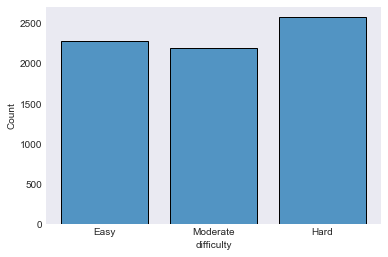

In [54]:
plt.style.use('seaborn-dark')
sns.histplot(df_new, x = df_new['difficulty'],shrink=.8)


Fortunately the distribution didn't change much after cleaning.

# More feature engineering

## 1. Normalized score

In order to classify videos and their success we will define the variable below:
<br/><br/>
$$
score\_normalized = \frac{score(\%)}{max(score(\%))} \times 100
$$
<br/><br/>

This will give the video with maximum score a normalized score of 100.

In [55]:
# Create a new column: normalized_score
df_new['normalized_score'] = df_new['score(%)']*100/max(df_new['score(%)'])
#'''

## 2. Video quality

The last variable we will create is 'video_quality' which will help us to divide the dataset according their quality. For that we will need to compute the quartiles:


In [56]:
df_new.normalized_score.quantile([0.2,0.4,0.6,0.8])


0.2     3.968146
0.4     6.612066
0.6     9.088363
0.8    12.911777
Name: normalized_score, dtype: float64


We will classify each video as:

'very high' - videos with 'normalized_score' in the (13,100] interval (first quantile),

'high' - videos with 'normalized_score' in the (9.2,13] interval (second quantile),

'average' - videos with 'normalized_score' in the (6.7,9.2] interval (third quantile),

'low'- videos with 'normalized_score' in the (4,6.7] interval (forth quantile),

'very low'- videos with 'normalized_score' in the \[0,4] interval (fifth quantile).

In [57]:
# Create a new column: video_quality
conditions = [ 
              (df_new['normalized_score'] <= 100) & (df_new['normalized_score'] > 13),
              (df_new['normalized_score'] <= 13) & (df_new['normalized_score'] > 9.2),
              (df_new['normalized_score'] <= 9.2) & (df_new['normalized_score'] > 6.7),
              (df_new['normalized_score'] <= 6.7) & (df_new['normalized_score'] > 4),
              (df_new['normalized_score'] <= 4) & (df_new['normalized_score'] > 0)    
             ]

values = ['very high','high','average','low','very low']

# Create a column to classify videos according to their quality
df_new['video_quality'] = np.select(conditions,values)

## 2. Video grade

The last variable we will create is 'video_grade' which will help us to divide the dataset according their grade from 1 to 10. For that we will need to compute the quantiles:

In [58]:
df_new.normalized_score.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])


0.1     2.323690
0.2     3.968146
0.3     5.361665
0.4     6.612066
0.5     7.727083
0.6     9.088363
0.7    10.721448
0.8    12.911777
0.9    16.819131
Name: normalized_score, dtype: float64

We will classify each video as grade:

1 - videos with 'normalized_score' in the (0, 2.3] interval (first quantile),

2 - videos with 'normalized_score' in the (2.3, 4] interval (second quantile),

3 - videos with 'normalized_score' in the (4, 5.4] interval (third quantile),

4 - videos with 'normalized_score' in the (5.4, 6.6] interval (forth quantile),

5 - videos with 'normalized_score' in the (6.6, 7.7] interval (fifth quantile).

6 - videos with 'normalized_score' in the (7.7, 9.1] interval (sixth quantile).

7 - videos with 'normalized_score' in the (9.1, 10.7] interval (seventh quantile).

8 - videos with 'normalized_score' in the (10.7, 12.9] interval (eighth quantile).

9 - videos with 'normalized_score' in the (12.9, 16.8] interval (nineth quantile).

10 - videos with 'normalized_score' in the (16.8, 100] interval (tenth quantile).

In [59]:
# Create a new column: video_quality
conditions = [ 
              (df_new['normalized_score'] <= 100) & (df_new['normalized_score'] > 16.8),
              (df_new['normalized_score'] <= 16.8) & (df_new['normalized_score'] > 12.9),
              (df_new['normalized_score'] <= 12.9) & (df_new['normalized_score'] > 10.7),
              (df_new['normalized_score'] <= 10.7) & (df_new['normalized_score'] > 9.1),
              (df_new['normalized_score'] <= 9.1) & (df_new['normalized_score'] > 7.7),
              (df_new['normalized_score'] <= 7.7) & (df_new['normalized_score'] > 6.6),
              (df_new['normalized_score'] <= 6.6) & (df_new['normalized_score'] > 5.4),
              (df_new['normalized_score'] <= 5.4) & (df_new['normalized_score'] > 4),
              (df_new['normalized_score'] <= 4) & (df_new['normalized_score'] > 2.3),
              (df_new['normalized_score'] <= 2.3) & (df_new['normalized_score'] >= 0),
                            

             ]

values = [10,9,8,7,6,5,4,3,2,1]

# Create a column to classify videos according to their quality
df_new['video_grade'] = np.select(conditions,values)

In [60]:
df_new

video_id                                              title  \
0     YBt1-ry_cbw  Stoodi | Pocket Aula: Física - Movimento e Rep...   
1     ufqQQIH2nYo  Repouso e Movimento | FÍSICA - Parte 1 | Intro...   
2     Zb80lraoDD4       CINEMÁTICA - REPOUSO, MOVIMENTO E TRAJETÓRIA   
3     yYxS0uNwbV0   9º Ano - Física - Aula 01 -  Movimento e repouso   
4     canvT3BCby4                                Movimento e Repouso   
...           ...                                                ...   
7615  69kETB2XcCc      PROVA DE FÍSICA UFU 2021/2 -1° dia - Medicina   
7616  -fxTI2dqmRg              ITA 2019 Vestibular Fase 1 Questão 03   
7617  WLGG_ObuSpc  Testando as Leis de Newton em casa | Física na...   
7618  Ox8q7q-GEZw  1ª e 3ª série I Física I Gravitação Universal ...   
7619  0ckfxGJhLgk                                   A Física do ENEM   

                                            description  \
0     Nessa Pocket Aula,  professor Doug, de Física,...   
1     *Ideal para alunos de Ensino Fundamental 2 e R...   
2     #física #profgiovanelli #enem\n\nSalve Salve g...   
3     Matéria: \n- Conceitos básicos de movimento (r...   
4     Neste vídeo explico como a questão de saber se...   
...                                                 ...   
7615  Nesse vídeo resolveremos a prova do vestibular...   
7616  Conheça meu curso de Física para Enem e vestib...   
7617  🏆 Conheça o cursinho com FOCO em APROVAÇÃO: ht...   
7618                                                  0   
7619                                                  0   

                                                   tags  \
0     ['vestibular', 'ENEM', 'videoaulas', 'aula', '...   
1     ['euadorociencia', 'eu adoro ciencia', 'cienci...   
2     ['trajetória', 'movimento uniforme', 'repouso ...   
3     ['9º Ano', 'Física', 'Movimento', 'Ensino Fund...   
4     ['física', 'cinemática', 'cinemática escalar',...   
...                                                 ...   
7615  ['UFU', 'prova UFU 2020', 'resolução UFU', 'pr...   
7616  ['Vestibular', 'Ciências da Natureza', 'Física...   
7617  ['enem', 'enem 2021', 'curso enem', 'cursinho ...   
7618  ['Enem', 'SAE Digital', 'Sistema', 'Ensino', '...   
7619                                                NaN   

                    channel_id  duration  view_count  like_count       topic  \
0     UCUDJR8h5P28xaN7UBEPo0VQ   PT5M19S       42501      3363.0  Cinematica   
1     UC7DL9qIVhfIyz_XtIksz89A    PT9M3S        7380       495.0  Cinematica   
2     UCs2Aki4U0oQsEhVD9TsnlCA   PT7M27S        6132       460.0  Cinematica   
3     UCfZrmVptdavCbKDz49c_EXQ  PT11M33S       74121      2685.0  Cinematica   
4     UCeKXMqEsRh0uG2mifDM6Bxw   PT4M39S        4774       257.0  Cinematica   
...                        ...       ...         ...         ...         ...   
7615  UCfZWurbbFlQrx440UtwmATg  PT13M39S        2078        67.0    Dinamica   
7616  UCSdrRq5JGx2U0jAFjmKF0aA   PT7M30S        7287       589.0    Dinamica   
7617  UCWv7JMNjrWlVtkiBmygefHQ  PT14M22S        3814       343.0    Dinamica   
7618  UCVBZBrH7bBq-Q3XvE2MaSsg     PT16M         121         6.0    Dinamica   
7619                       NaN   PT8M32S        5459        20.0    Dinamica   

                                subtopic difficulty  \
0             Movimento e Repouso fisica       Easy   
1             Movimento e Repouso fisica       Easy   
2             Movimento e Repouso fisica       Easy   
3             Movimento e Repouso fisica       Easy   
4             Movimento e Repouso fisica       Easy   
...                                  ...        ...   
7615  Lei de gravitação Universal fisica   Moderate   
7616  Lei de gravitação Universal fisica   Moderate   
7617  Lei de gravitação Universal fisica   Moderate   
7618  Lei de gravitação Universal fisica   Moderate   
7619  Lei de gravitação Universal fisica   Moderate   

                    duration_dt  duration_seconds  score(%)  normalized_score  \
0     0 days 00:05:19.0

In [61]:
 df_new.to_csv('clean.csv')